In [26]:

import numpy as np
from utils import helpers as h
from utils import settings as s
from analysis import analysis

2024-09-04 18:33:44,468 [WARNING] utils.data_frame_processor: DataFrame is not yet initialized.
2024-09-04 18:33:44,470 [INFO] utils.data_frame_processor: DataFrame loaded and concatenated successfully from CSV.
2024-09-04 18:33:44,622 [WARNING] utils.data_frame_processor: DataFrame is not yet initialized.
2024-09-04 18:33:44,625 [INFO] utils.data_frame_processor: DataFrame loaded and concatenated successfully from CSV.


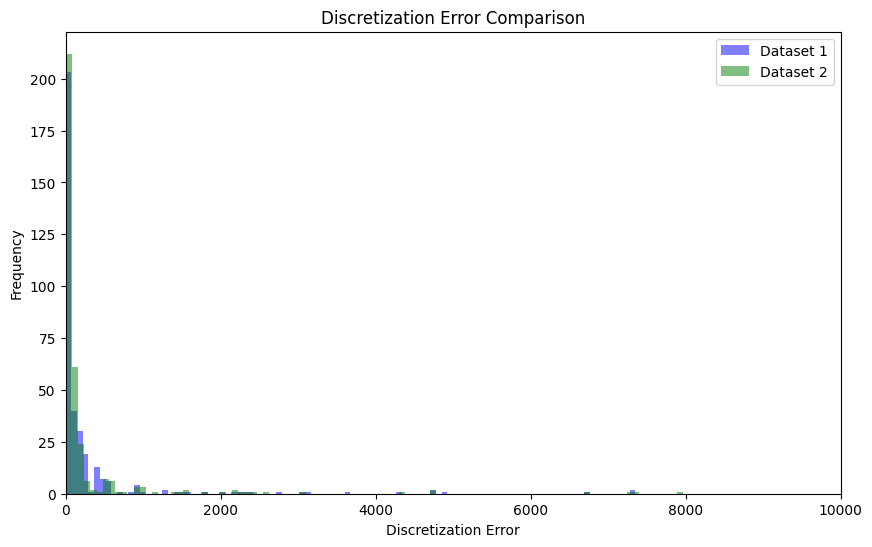

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the necessary functions and classes are imported from 'analysis' and 'h'

# First Dataset
Data1 = analysis.DataframeAnalysis()
Data1.load_df_from_csv(r'C:\Users\petre\Documents\GitHub\MATSimPipeline\output\20240904_183147\location_assignment_result_load_main_advanced_petre_100-branches.csv')
Data1.df = Data1.df[Data1.df['to_location'].notna()]
Data1.df['from_location'] = Data1.df['from_location'].apply(h.convert_to_point)
Data1.df['to_location'] = Data1.df['to_location'].apply(h.convert_to_point)
Data1.evaluate_distance_deviations_from_df()

# Second Dataset
Data2 = analysis.DataframeAnalysis()
Data2.load_df_from_csv(r'C:\Users\petre\Documents\GitHub\MATSimPipeline\output\20240904_175908\location_assignment_result_load_main_hoerl.csv')
Data2.df = Data2.df[Data2.df['to_location'].notna()]
Data2.df['from_location'] = Data2.df['from_location'].apply(h.convert_to_point)
Data2.df['to_location'] = Data2.df['to_location'].apply(h.convert_to_point)
Data2.evaluate_distance_deviations_from_df()

# Ensure the maximum value is limited to 1000
# Data1.df['discretization_error'] = Data1.df['discretization_error'].clip(upper=1000)
# Data2.df['discretization_error'] = Data2.df['discretization_error'].clip(upper=1000)

# Plotting in the same plot
plt.figure(figsize=(10, 6))

# Plot histogram for Dataset 1
Data1.df['discretization_error'].plot.hist(bins=100, alpha=0.5, color='blue', label='Dataset 1')

# Plot histogram for Dataset 2
Data2.df['discretization_error'].plot.hist(bins=100, alpha=0.5, color='green', label='Dataset 2')

# Adding title and labels
plt.title('Discretization Error Comparison')
plt.xlabel('Discretization Error')
plt.ylabel('Frequency')
plt.xlim(0, 10000)
plt.legend()

plt.show()


mean, median, plot deviation dist, the same per chain, -- capacity matching??

In [37]:
Data1.df['discretization_error'].describe()

count     348.000000
mean      314.268478
std       925.854173
min         0.013284
25%        10.266579
50%        40.970562
75%       176.557884
max      7350.000000
Name: discretization_error, dtype: float64

In [38]:
Data2.df['discretization_error'].describe()


count     348.000000
mean      302.243328
std       960.909741
min         0.052386
25%        14.394070
50%        51.068857
75%       143.635410
max      7961.787561
Name: discretization_error, dtype: float64